In [2]:
import matplotlib.pyplot as plt

In [3]:
test_data=[]

file=open("speed_test.txt",'r')
row = file.readlines()

lines_count = len(row)
cur_line = 0

def scan_set(m,descr):
    global cur_line
    global lines_count
    global test_data
    
    rec={}
    rec['m']=m
    rec['description'] = descr
    
    pwms={}
        
    start_time=0
    last_pwm=''
    inc=[]
    dec=[]
    
    while cur_line < lines_count:
        l = row[cur_line]
        if l.find(";") >= 0:
            break
        
        t_pos = l.find("time=")
        if t_pos<0:
            cur_line+=1
            continue
        
        l=l[t_pos+len("time="):]
        l=l.replace("cur_speed=","")
        l=l.replace("PWM=","")
        l=l.split()
        
        t=int(l[0])
        speed=float(l[1])
        pwm=l[2]
        
        if start_time==0:
            start_time=t
        
        if last_pwm!=pwm and pwm!='0.00':
            if len(inc)>0:
                pwms[last_pwm] = {"inc":inc,"dec":dec}
            
            inc=[]
            dec=[]
            last_pwm=pwm
            start_time = t
        
        if pwm != '0.00':
            inc.append([t-start_time,speed])
        else:
            dec.append([t-start_time,speed])
        
        cur_line+=1
    
    if len(inc)>0:
        pwms[last_pwm] = {"inc":inc,"dec":dec}
    
    rec['pwms'] = pwms
    test_data.append(rec)

            
        
cur_line=cur_line+1
scan_set(0,"free wheel")
cur_line=cur_line+1
scan_set(8.3,"empty cart")
cur_line=cur_line+1
scan_set(18.8,"cart+10.5kg")
cur_line=cur_line+1
scan_set(94.5,"cart+86.2kg")
        
        

M=0kg free wheel


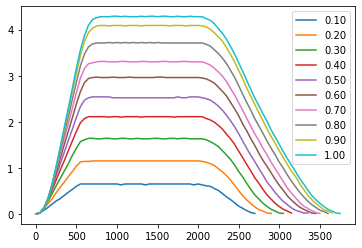

M=8.3kg empty cart


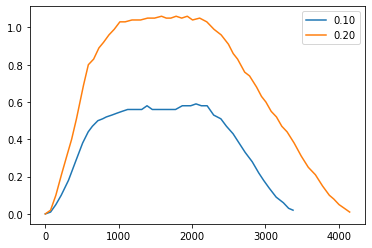

M=18.8kg cart+10.5kg


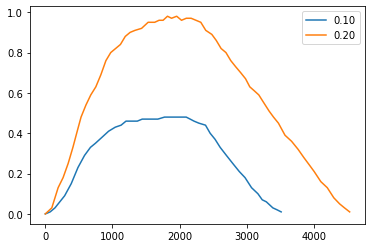

M=94.5kg cart+86.2kg


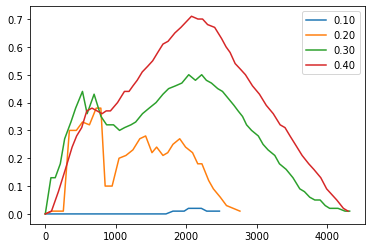

In [4]:
for rec in test_data:
    print(f'M={rec["m"]}kg {rec["description"]}')
    pwms = rec['pwms']
    for pwm in pwms:
        a=pwms[pwm]['inc'] + pwms[pwm]['dec']

        t=[]
        s=[]
        for v in a:
            t.append(v[0])
            s.append(v[1])

        plt.plot(t,s,label=pwm)
        plt.legend()
    plt.show()

Compare speed for different masses
PWM=0.10


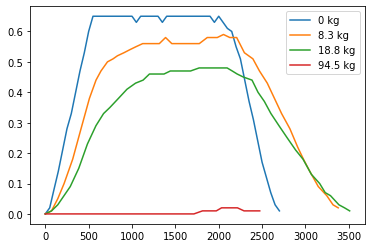

PWM=0.20


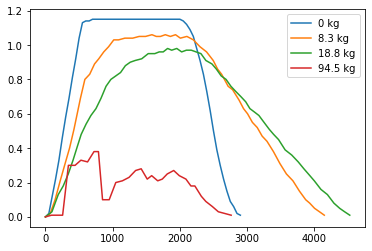

PWM=0.30


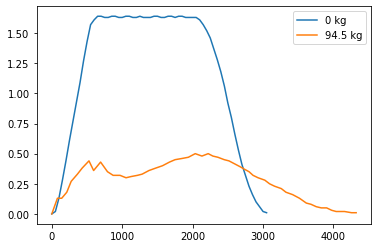

PWM=0.40


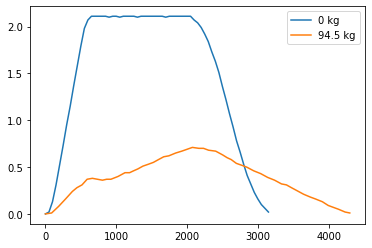

In [5]:
print("Compare speed for different masses")
for pwm in ['0.10','0.20','0.30','0.40']:
    print(f"PWM={pwm}")
    for rec in test_data:
        if pwm in rec['pwms']:
            pwm_rec = rec['pwms'][pwm]
            a=pwm_rec['inc'] + pwm_rec['dec']

            t=[]
            s=[]
            for v in a:
                t.append(v[0])
                s.append(v[1])

            plt.plot(t,s,label=str(rec["m"])+' kg')
            plt.legend()
    plt.show()

M=0kg free wheel
p=0.10->s=0.6433 k=6.433 1/k=0.1554
p=0.20->s=1.15 k=5.75 1/k=0.1739
p=0.30->s=1.633 k=5.444 1/k=0.1837
p=0.40->s=2.11 k=5.275 1/k=0.1896
p=0.50->s=2.533 k=5.067 1/k=0.1974
p=0.60->s=2.96 k=4.933 1/k=0.2027
p=0.70->s=3.303 k=4.719 1/k=0.2119
p=0.80->s=3.71 k=4.637 1/k=0.2156
p=0.90->s=4.087 k=4.541 1/k=0.2202
p=1.00->s=4.283 k=4.283 1/k=0.2335


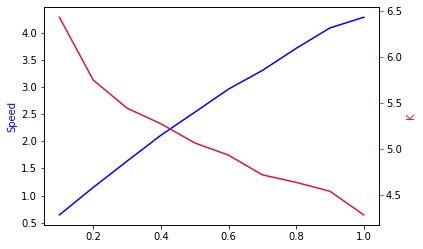

M=8.3kg empty cart
p=0.10->s=0.58 k=5.8 1/k=0.1724
p=0.20->s=1.057 k=5.283 1/k=0.1893


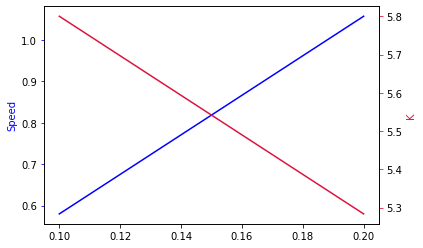

M=18.8kg cart+10.5kg
p=0.10->s=0.48 k=4.8 1/k=0.2083
p=0.20->s=0.9767 k=4.883 1/k=0.2048


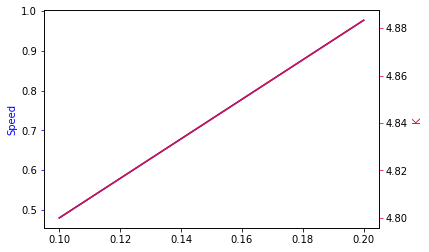

M=94.5kg cart+86.2kg
p=0.10->s=0.006667 k=0.06667 1/k=15.0
p=0.20->s=0.2467 k=1.233 1/k=0.8108
p=0.30->s=0.46 k=1.533 1/k=0.6522
p=0.40->s=0.6467 k=1.617 1/k=0.6186


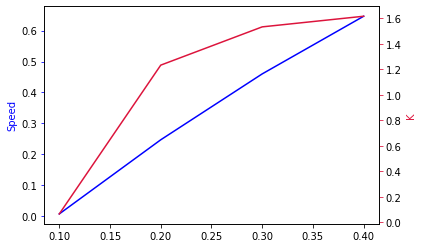

In [9]:

for rec in test_data:
    print(f'M={rec["m"]}kg {rec["description"]}')

    pp=[]
    ss=[]
    kk=[]

    pwms = rec['pwms']
    for pwm in pwms:
        inc=pwms[pwm]['inc']

        s=(inc[-1][1]+inc[-2][1]+inc[-3][1])/3
        p=float(pwm)
        k=s/p

        print(f'p={pwm}->s={s:0.4} k={k:0.4} 1/k={1/k:0.4}')

        pp.append(p)
        ss.append(s)
        kk.append(k)

    #plt.plot(pp,ss,label="pwm->speed"+str(rec["m"])+' kg')
    #plt.plot(pp,kk,label="pwm->k")
    #plt.legend()
    
    fig, ax1 = plt.subplots()
    color1 ='blue'
    ax1.plot(pp,ss, color = color1)
    ax1.set_ylabel('Speed',color = color1);
    ax1.tick_params(axis='y',color = color1);

    color2 ='crimson'
    ax2 = ax1.twinx();
    ax2.plot(pp,kk, color = color2)
    ax2.set_ylabel('K', color = color2);
    ax2.tick_params(axis='y',color = color2);
    
    plt.show()
    